In [30]:
#This simple python notebook shows how to generate 2D data distribution which follows gaussian distribution properties
import numpy
from numpy import random
from random import gauss
import matplotlib.pyplot as plt  

In [31]:
#gaussian distribution can be characterised by its mean value and standard deviation parameters 
#where mean value states on the average where data point lies and standard deviation states the spread of data points
#below is a function which can be used to generate 2 Dimensional Gaussian Distribution
def gauss_2d(meanX, meanY, stdX, stdY):
    x = gauss(meanX, stdX)
    y = gauss(meanY, stdY)
    return (x, y)

In [32]:
meanX=1
meanY=2
stdX=1
stdY=2

datasetLength=1000
datasetDim=2

dataset1 = numpy.empty(shape=(datasetLength,datasetDim))


dataset1.shape
for i in range(datasetLength): 
    dataset1[i,:] = gauss_2d(meanX, meanY, stdX, stdY)

In [33]:
#now shift the mean position in 2D data sample space and generate datapoints for a new cluster
meanX=1+2
meanY=2+2
stdX=1
stdY=2

datasetLength=1000
datasetDim=2

dataset2 = numpy.empty(shape=(datasetLength,datasetDim))


dataset2.shape
for i in range(datasetLength): 
    dataset2[i,:] = gauss_2d(meanX, meanY, stdX, stdY)

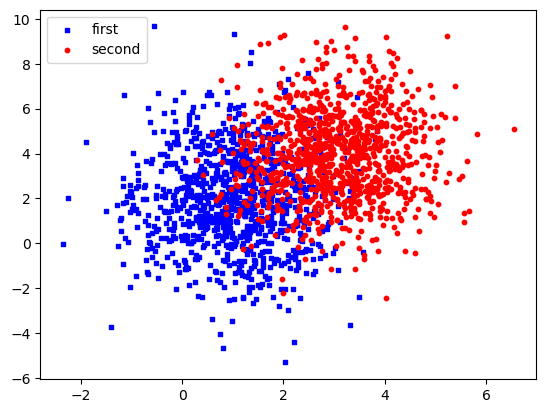

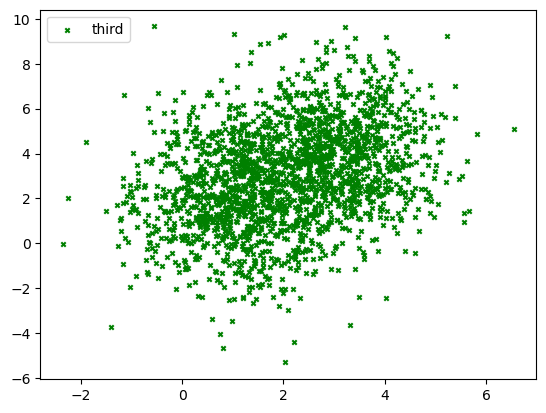

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(dataset1[:,0],dataset1[:,1], s=10, c='b', marker="s", label='first')
ax1.scatter(dataset2[:,0],dataset2[:,1], s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left')
plt.show()

# plot_combined_dataset=input('Shall I combine these two datasets and show you the combined distribution=')
#Now you have generated two clusters with datapoints following two different gaussian distributions
#try mixing dataset1 and dataset2
fig = plt.figure()
ax1 = fig.add_subplot(111)
combined_dataset=numpy.append(dataset1,dataset2,axis=0)
combined_dataset.shape
ax1.scatter(combined_dataset[:,0],combined_dataset[:,1], s=10, c='g', marker="x", label='third')

plt.legend(loc='upper left')

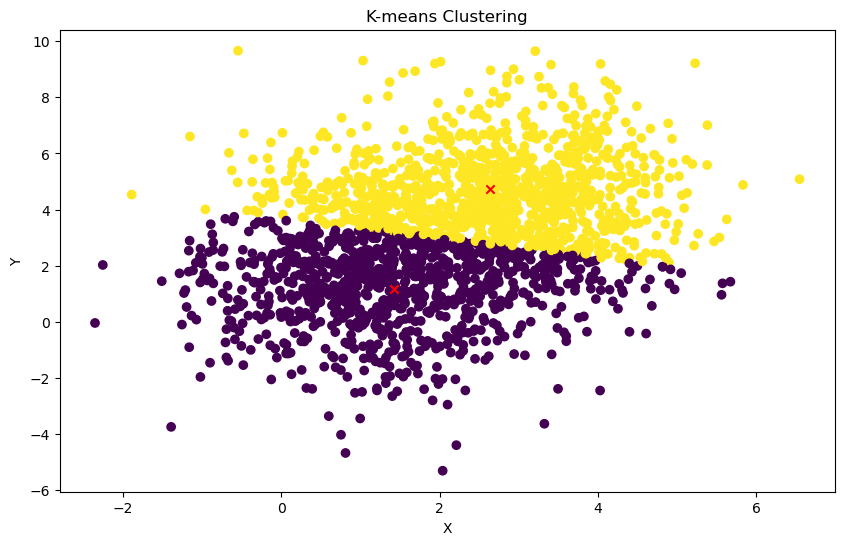

In [35]:
#Now your job is to apply clustering algorithms to label each of the [x,y] datapoints from combined_dataset 
#with its cluster id = 1 or 2 - this case
#Try K-mean clustering, Expectation Maximization method also known as EM algorithm

# To implement K means clustering


from math import dist
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# Set the seed at the beginning of the script
np.random.seed(0)

def pick_centroids(data, k=2):
    indices = np.random.choice(len(data), k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [((point[0] - centroid[0])**2 + (point[1] - centroid[1])**2)**0.5 for centroid in centroids]
        cluster = distances.index(min(distances))
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, old_centroids, k=2):
    new_centroids = np.zeros_like(old_centroids)
    for i in range(k):
        cluster_pts = data[clusters == i]
        new_centroids[i] = cluster_pts.mean(axis=0)
    return new_centroids

def k_means(data, k=2):
    centroids = pick_centroids(data, k)
    clusters = assign_clusters(data, centroids)
    new_centroids = update_centroids(data, clusters, centroids, k)
    
    while not np.array_equal(centroids, new_centroids):
        centroids = new_centroids
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, centroids, k)
    
    return clusters, centroids

# Assuming combined_dataset is defined
clusters, centroids = k_means(combined_dataset, 2)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset[:, 0], combined_dataset[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# print(clusters)
# print(centroids)
# print(new_centroids)
